# Decision Trees: Diabetes Dataset

In this project, we will employ a decision tree to classify the data in our diabetes dataset.

In [1]:
# Basic Data Science MOdules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree related modules
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# Modules for decision tree visualization
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

First we upload our dataset into a pandas Dataframe

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
# visualize the first 3 rows of dataframe
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Now we define the **features** and **target** that we would like to use for training.

In [4]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols]
y = df.Outcome

To visualize the pairwise relationships in the features, we will use seaborn.pairplot

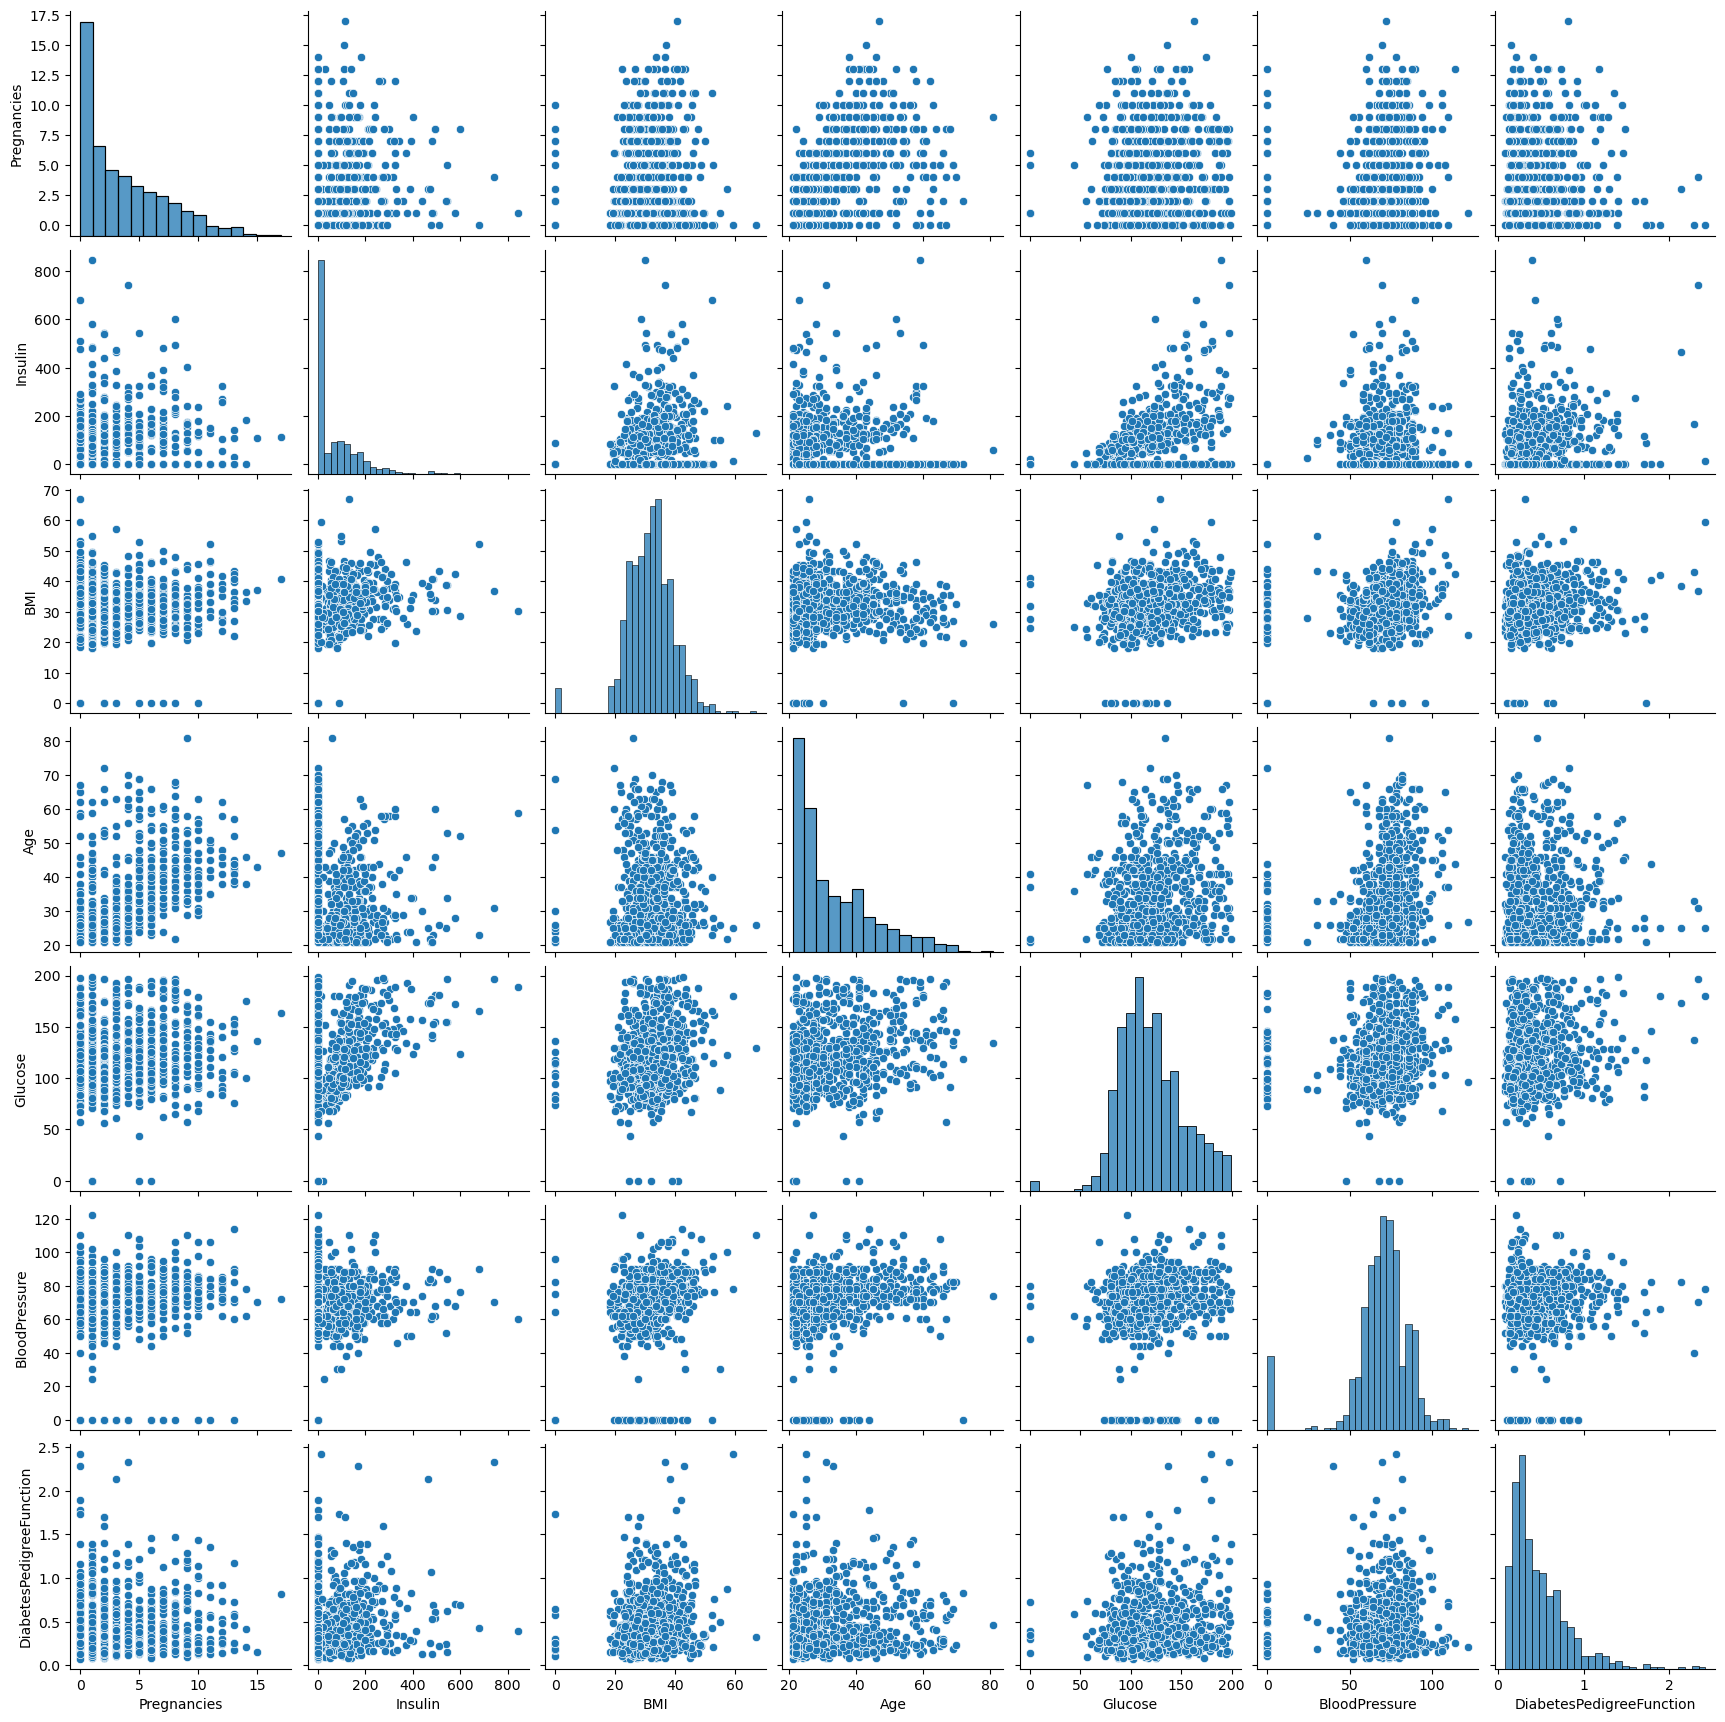

In [5]:
sns.pairplot(X)

To use our features and target data for machine learning, we will split them into training and test sets.

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Now, we will construct our model and train it using the data.

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

We can also display the scores for both the training and test data.

In [8]:
print('Training data score: ', clf.score(X_train, y_train))
print('Test data score: ', clf.score(X_test, y_test))

Training data score:  0.7635009310986964
Test data score:  0.7705627705627706


Based on the observed scores, it seems that the decision tree might not be the most effective method for analyzing the diabetes dataset

For a clearer understanding, we can conclude by visualizing the decision tree of our system.

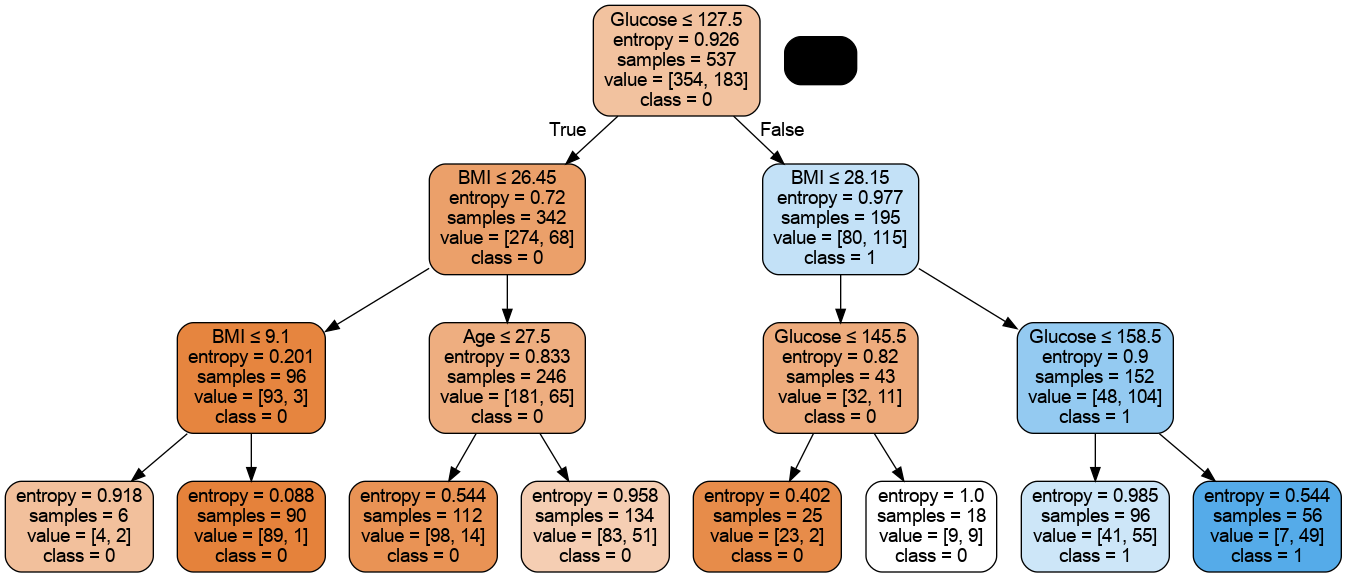

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())